In [1]:
# import stuff
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random as random
from collections import Counter
from scipy.optimize import linprog
import math

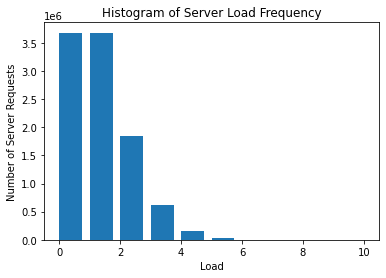

In [2]:
# Problem 2 
# Part A 

# generate 10^7 servers and set that value to N 
N = [0] * (10**7)

# loop through all the values of N 
for i in range(len(N)):
    random_index = random.randint(1, len(N))
    random_index = random_index - 1
    N[random_index] = N[random_index] + 1 
    
    
plt.hist(N, width=0.75)
plt.title('Histogram of Server Load Frequency')
plt.xlabel('Load')
plt.ylabel('Number of Server Requests')
plt.show()

# foo = Counter(N)
# print(foo)

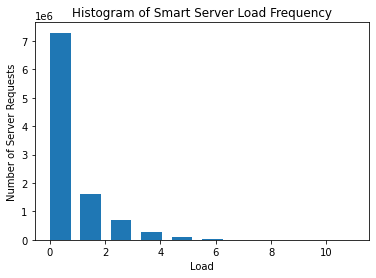

In [3]:
# Problem 2 Part B
# generate 10^7 servers and set that value to N 
N2 = [0] * (10**7)

# loop through all the values of N 
for i in range(len(N2)):
    rindex1 = random.randint(1, len(N2))
    rindex2 = random.randint(1, len(N2))
    
    while rindex1 == rindex2:
        rindex1 = random.randint(1, len(N2))
        rindex2 = random.randint(1, len(N2))
        
    rindex1 = rindex1 - 1
    rindex2 = rindex2 - 1
    
    if rindex1 < rindex2:
        N2[rindex1] = N2[rindex1] + 1
    elif rindex2 < rindex1:
        N2[rindex2] = N2[rindex2] + 1

plt.hist(N2, width=0.75)
plt.title('Histogram of Smart Server Load Frequency')
plt.xlabel('Load')
plt.ylabel('Number of Server Requests')
plt.show()
    
        
        
    

    


In [4]:
# Problem 1 set cover 
# Part A and Part C

# set up values 
n = 500
m = 500
result = []

# keep track of the skills for people
for i in range(n):
    skills = []
    for j in range(25):
        skill = random.randrange(0, m)
        while skill in skills:
            skill = random.randrange(0, m)
        skills.append(skill)
    result.append(skills)


# reverse the inequalities for use in linear program solver
check = []
for i in range(n):
    foo = []
    for j in range(m):
        # check if the person at index i in result has the skill represented by j
        # since j takes on a value between 0 and 499
        if j in result[i]:
            foo.append(-1)
        else:
            foo.append(0)
    check.append(foo)

# set up linear programming 
c = [1] * n
A_ub = check
b_ub = [-1] * n 
bnd = [[0, 1]] * n

opt = linprog(c=c, A_ub=A_ub, b_ub=b_ub, bounds=bnd)


        

In [5]:
# Problem 1 Part C
np.round(opt.x, decimals=4)

array([0.1031, 0.    , 0.    , 0.0446, 0.    , 0.065 , 0.1016, 0.0648,
       0.1566, 0.    , 0.0169, 0.0567, 0.    , 0.0134, 0.    , 0.1851,
       0.0514, 0.1227, 0.0466, 0.    , 0.    , 0.    , 0.0576, 0.    ,
       0.057 , 0.0137, 0.0318, 0.    , 0.0683, 0.    , 0.0135, 0.    ,
       0.0147, 0.    , 0.0832, 0.1199, 0.0738, 0.1431, 0.    , 0.0502,
       0.    , 0.0476, 0.    , 0.0745, 0.0316, 0.    , 0.    , 0.    ,
       0.1261, 0.0327, 0.0451, 0.    , 0.0446, 0.1054, 0.0167, 0.0416,
       0.0131, 0.0681, 0.    , 0.    , 0.    , 0.0399, 0.0747, 0.135 ,
       0.0953, 0.0558, 0.    , 0.0243, 0.0307, 0.1224, 0.    , 0.0949,
       0.    , 0.1299, 0.    , 0.0462, 0.    , 0.0402, 0.0587, 0.0155,
       0.0998, 0.0255, 0.073 , 0.1346, 0.0308, 0.0245, 0.0227, 0.    ,
       0.009 , 0.    , 0.0174, 0.0437, 0.    , 0.1104, 0.0304, 0.    ,
       0.0719, 0.    , 0.0273, 0.0885, 0.    , 0.    , 0.    , 0.0573,
       0.0472, 0.    , 0.0267, 0.137 , 0.0826, 0.0562, 0.004 , 0.    ,
      

In [6]:
# Problem 1 Part D

t_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
n = 500
            
for k in range(len(t_values)):
    t_val = t_values[k]
    hired = 0
    skills_covered = 0
    skill_check = [1] * 500
    for i in range(len(opt.x)):
        foobar = min(1, math.floor(t_val * opt.x[i]))
        if foobar == 1:
            hired += 1
            gg = result[i]
            
            for p in gg:
                if skill_check[p] == 1:
                    skills_covered += 1
            

                    
            for d in range(len(gg)):
                skill_check[gg[d]] = 0
    print(f"Number of people hired: {hired} at iteration t = {t_val}")
    print(f"skills uncovered: {500 - skills_covered}")
    print()
    
        
    
        

# print(opt.x)

Number of people hired: 0 at iteration t = 1
skills uncovered: 500

Number of people hired: 0 at iteration t = 2
skills uncovered: 500

Number of people hired: 0 at iteration t = 3
skills uncovered: 500

Number of people hired: 0 at iteration t = 4
skills uncovered: 500

Number of people hired: 0 at iteration t = 5
skills uncovered: 500

Number of people hired: 3 at iteration t = 6
skills uncovered: 430

Number of people hired: 7 at iteration t = 7
skills uncovered: 347

Number of people hired: 20 at iteration t = 8
skills uncovered: 168

Number of people hired: 32 at iteration t = 9
skills uncovered: 96

Number of people hired: 47 at iteration t = 10
skills uncovered: 52

Number of people hired: 66 at iteration t = 11
skills uncovered: 18

Number of people hired: 74 at iteration t = 12
skills uncovered: 11

Number of people hired: 90 at iteration t = 13
skills uncovered: 7

Number of people hired: 103 at iteration t = 14
skills uncovered: 4

Number of people hired: 119 at iteration t 